# **Loading dataset into Google Colab**

In [ ]:
#reading dataset from googledrive

from google.colab import drive

!pip install gdown
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1fqd84fAL3Z1ZofE6R8dbSTZ4W_El81wq
!unzip "./news_summary.zip" -d "./"

#https://drive.google.com/file/d/1fqd84fAL3Z1ZofE6R8dbSTZ4W_El81wq/view?usp=sharing

In [ ]:
import pandas as pd

df_test = pd.read_csv("/content/news_summary/test.csv", delimiter='\t')
df_train = pd.read_csv("/content/news_summary/train.csv", delimiter='\t')

In [ ]:
df_train['article']

0        به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در ...
1        به گزارش شانا به نقل از شرکت ملی صنایع پتروشیم...
2        به گزارش شانا به نقل از شرکت پالایش گاز شهید ه...
3        به گزارش خبرنگار ایمنا، سعید نظری در صفحه اینس...
4        به گزارش شانا، سیدباقر مرتضوی، مشاور وزیر نفت ...
                               ...                        
82017    به گزارش ایمنا، تیم‌های ملی هاکی زنان و مردان ...
82018    به گزارش بازار، مصطفی قلی خسروی افزود: در کشور...
82019    به گزارش ایمنا، به نقل از پایگاه اطلاع‌رسانی ک...
82020    به گزارش خبرگزاری خبرآنلاین و به نقل از ایران ...
82021    به گزارش شانا به نقل از دبیرخانه سازمان کشورها...
Name: article, Length: 82022, dtype: object

In [ ]:
df_train['summary']

0        مدیرعامل شرکت ملی نفت، عملکرد مدیریت امور بین‎...
1        سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنا...
2        پالایشگاه گاز خانگیران با هدف معرفی گوگرد بنتو...
3        سخنگوی شورای شهر شیراز گفت: روند عمرانی و شهرس...
4        مشاور وزیر نفت و مدیرکل اچ اس یی و پدافند غیرع...
                               ...                        
82017    تیم‌های ملی هاکی زنان و مردان ایران در سومین د...
82018    قلی خسروی، رئیس اتحادیه مشاوران املاک تهران گف...
82019    رئیس کمیته امداد از آغاز مرحله دوم پویش ایران ...
82020    گروه صنعتی ایران‌خودرو به منظور تامین نیاز مشت...
82021    مجموع کاهش جهانی تولید نفت خام می‌تواند به بیش...
Name: summary, Length: 82022, dtype: object

In [ ]:
df_train.head()

id  \
0  738e296491f8b24c5aa63e9829fd249fb4428a66   
1  00fa692a178a2454419284199df6b6690a75ade0   
2  1bdb42b53c080b36318b82051edacb5c8f61f6a2   
3  73ef47636beaf86610695f62716da113624ed315   
4  0c45a2e8b760cb6779a8be426f0075893e4e8b44   

                                               title  \
0   مدیریت فروش نفت در دوران تحریم هوشمندانه عمل کرد   
1                  سبد محصولات پتروشیمی متنوع می‌شود   
2  معرفی گوگرد بنتونیتی پالایشگاه خانگیران در نما...   
3  روند عمرانی شیراز با فروکش کردن کرونا عادی می‌شود   
4  قدردانی از اقدام ایثارگرانه نیروی حراست در اطف...   

                                             article  \
0  به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در ...   
1  به گزارش شانا به نقل از شرکت ملی صنایع پتروشیم...   
2  به گزارش شانا به نقل از شرکت پالایش گاز شهید ه...   
3  به گزارش خبرنگار ایمنا، سعید نظری در صفحه اینس...   
4  به گزارش شانا، سیدباقر مرتضوی، مشاور وزیر نفت ...   

                                             summary    category  \
0  مدیرعامل شرکت ملی نفت، عملکرد مدیریت امور بین‎...  Oil-Energy   
1  سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنا...  Oil-Energy   
2  پالایشگاه گاز خانگیران با هدف معرفی گوگرد بنتو...  Oil-Energy   
3  سخنگوی شورای شهر شیراز گفت: روند عمرانی و شهرس...       Local   
4  مشاور وزیر نفت و مدیرکل اچ اس یی و پدافند غیرع...  Oil-Energy   

     categories network                                               link  
0           نفت   Shana  https://www.shana.ir/news/275284/%D9%85%D8%AF%...  
1      پتروشیمی   Shana  https://www.shana.ir/news/293940/%D8%B3%D8%A8%...  
2           گاز   Shana  https://www.shana.ir/news/292952/%D9%85%D8%B9%...  
3  پارلمان شهری    Imna  https://www.imna.ir/news/416660/%D8%B1%D9%88%D...  
4           گاز   Shana  https://www.shana.ir/news/277191/%D9%82%D8%AF%...

# **Step 1) Preprocess dataset**

In [ ]:
!pip install numpy
!pip install hazm

In [ ]:
import pandas as pd
import re
from hazm import word_tokenize, stopwords_list

In [ ]:
# Remove unnecessary columns
train_data = df_train[['article', 'summary']]
test_data = df_test[['article', 'summary']]

In [ ]:
# Clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove special characters
    text = re.sub('[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text


train_data['article'] = train_data['article'].apply(clean_text)
train_data['summary'] = train_data['summary'].apply(clean_text)
test_data['article'] = test_data['article'].apply(clean_text)
test_data['summary'] = test_data['summary'].apply(clean_text)

<ipython-input-7-ab7fcb3954c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['article'] = train_data['article'].apply(clean_text)
<ipython-input-7-ab7fcb3954c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['summary'] = train_data['summary'].apply(clean_text)
<ipython-input-7-ab7fcb3954c2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
# Tokenize the text
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

train_data['article'] = train_data['article'].apply(tokenize)
train_data['summary'] = train_data['summary'].apply(tokenize)
test_data['article'] = test_data['article'].apply(tokenize)
test_data['summary'] = test_data['summary'].apply(tokenize)

<ipython-input-8-9bf767d759e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['article'] = train_data['article'].apply(tokenize)
<ipython-input-8-9bf767d759e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['summary'] = train_data['summary'].apply(tokenize)
<ipython-input-8-9bf767d759e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# Remove stopwords
def remove_stopwords(tokens):
    stopwords = stopwords_list()
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

train_data['article'] = train_data['article'].apply(remove_stopwords)
train_data['summary'] = train_data['summary'].apply(remove_stopwords)
test_data['article'] = test_data['article'].apply(remove_stopwords)
test_data['summary'] = test_data['summary'].apply(remove_stopwords)

<ipython-input-9-a304f9a1cc47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['article'] = train_data['article'].apply(remove_stopwords)
<ipython-input-9-a304f9a1cc47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['summary'] = train_data['summary'].apply(remove_stopwords)
<ipython-input-9-a304f9a1cc47>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
train_data['article']

0        [گزارش, شانا, علی, کاردر, امروز, ۲۷, دی, ماه, ...
1        [گزارش, شانا, نقل, شرکت, ملی, صنایع, پتروشیمی,...
2        [گزارش, شانا, نقل, شرکت, پالایش, گاز, شهید, ها...
3        [گزارش, خبرنگار, ایمنا, سعید, نظری, صفحه, اینس...
4        [گزارش, شانا, سیدباقر, مرتضوی, مشاور, وزیر, نف...
                               ...                        
82017    [گزارش, ایمنا, تیمهای, ملی, هاکی, زنان, مردان,...
82018    [گزارش, بازار, مصطفی, قلی, خسروی, کشورهای, رقم...
82019    [گزارش, ایمنا, نقل, پایگاه, اطلاعرسانی, کمیته,...
82020    [گزارش, خبرگزاری, خبرآنلاین, نقل, ایران, خودرو...
82021    [گزارش, شانا, نقل, دبیرخانه, سازمان, کشورهای, ...
Name: article, Length: 82022, dtype: object

In [ ]:
train_data['summary']

0        [مدیرعامل, شرکت, ملی, نفت, عملکرد, مدیریت, امو...
1        [سرپرست, مدیریت, برنامهریزی, توسعه, شرکت, ملی,...
2        [پالایشگاه, گاز, خانگیران, هدف, معرفی, گوگرد, ...
3        [سخنگوی, شورای, شهر, شیراز, عمرانی, شهرسازی, ش...
4        [مشاور, وزیر, نفت, مدیرکل, اچ, اس, یی, پدافند,...
                               ...                        
82017    [تیمهای, ملی, هاکی, زنان, مردان, ایران, سومین,...
82018    [قلی, خسروی, رئیس, اتحادیه, مشاوران, املاک, ته...
82019    [رئیس, کمیته, امداد, آغاز, مرحله, پویش, ایران,...
82020    [گروه, صنعتی, ایرانخودرو, تامین, مشتریان, سومی...
82021    [مجموع, کاهش, جهانی, تولید, نفت, خام, میتواند,...
Name: summary, Length: 82022, dtype: object

# **Step 2) GRU Model**

## **GRU for the whole dataset**

In [ ]:
!pip install gensim tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

In [ ]:
from gensim.models import Word2Vec

# Determine the desired embedding dimension
embedding_dim = 100

# Concatenate the article and summary texts for building Word2Vec vocabulary
all_texts = train_data['article'] + train_data['summary']

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_texts, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Get the vocabulary size and word embedding dimension
vocab_size = len(w2v_model.wv.key_to_index)
embedding_dim = w2v_model.vector_size

# Convert text sequences to numerical sequences
def text_to_sequences(texts):
    sequences = []
    for text in texts:
        sequence = []
        for word in text:
            if word in w2v_model.wv.key_to_index:
                sequence.append(w2v_model.wv.key_to_index[word])
            else:
                sequence.append(0)  # Use index 0 for out-of-vocabulary words
        sequences.append(sequence)
    return sequences

# Convert the preprocessed dataset to numerical sequences
train_article_sequences = text_to_sequences(train_data['article'])
train_summary_sequences = text_to_sequences(train_data['summary'])
test_article_sequences = text_to_sequences(test_data['article'])
test_summary_sequences = text_to_sequences(test_data['summary'])

# Pad the sequences to the same length
train_article_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_article_sequences, padding='post')
train_summary_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_summary_sequences, padding='post')
test_article_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_article_sequences, padding='post')
test_summary_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_summary_sequences, padding='post')


In [ ]:
hidden_units = 256
learning_rate = 0.001
num_epochs = 5

# Define the encoder-decoder model architecture
encoder_input = Input(shape=(None,))
encoder_embedding = Embedding(vocab_size, embedding_dim, trainable=True)(encoder_input)
encoder_output, encoder_state = GRU(units=hidden_units, return_state=True)(encoder_embedding)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(vocab_size, embedding_dim, trainable=True)(decoder_input)
decoder_gru = GRU(units=hidden_units, return_sequences=True, return_state=True)
decoder_output, _ = decoder_gru(decoder_embedding, initial_state=encoder_state)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_output = decoder_dense(decoder_output)

# Define the model
model = Model([encoder_input, decoder_input], decoder_output)

In [ ]:
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
optimizer = Adam(learning_rate)
loss = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

# Train the model
history = model.fit(
    [train_article_sequences, train_summary_sequences[:, :-1]],
    train_summary_sequences[:, 1:],
    epochs=num_epochs,
    validation_data=(
        [test_article_sequences, test_summary_sequences[:, :-1]],
        test_summary_sequences[:, 1:]
    )
)

In [ ]:
# Save the model
tf.keras.models.save_model(model, 'GRU_model.h5')

### **Evaluate GRU model for the whole dataset**

In [ ]:
#Load the saved GRU model

from keras.models import load_model

!gdown --id 1SZnk4MWe59y2I2AQO-_QSpH1ReJDfxVA

model = load_model('GRU_model.h5')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1SZnk4MWe59y2I2AQO-_QSpH1ReJDfxVA
From (redirected): https://drive.google.com/uc?id=1SZnk4MWe59y2I2AQO-_QSpH1ReJDfxVA&confirm=t&uuid=24c77ce7-f757-49f9-9af2-56cabae44cba
To: /content/GRU_model.h5
100% 984M/984M [00:22<00:00, 43.7MB/s]


In [ ]:
batch_size = 16  # Set a smaller batch size

# Convert the predicted sequences to text
def sequences_to_text(sequences):
    texts = []
    for sequence in sequences:
        text = []
        for index in sequence:
            word = w2v_model.wv.index_to_key[index]
            if word != '<PAD>':  # Exclude padding tokens
                text.append(word)
        texts.append(text)
    return texts

# Generate summaries in batches
predicted_summaries = []
num_samples = len(test_article_sequences)
for i in range(0, num_samples, batch_size):
    batch_article_sequences = test_article_sequences[i:i+batch_size]
    batch_summary_sequences = test_summary_sequences[i:i+batch_size]
    predictions = model.predict([batch_article_sequences, batch_summary_sequences[:, :-1]])
    batch_predicted_summaries = sequences_to_text(np.argmax(predictions, axis=-1))
    predicted_summaries.extend(batch_predicted_summaries)


1/1 [==============================] - 0s 64ms/step


In [ ]:
predicted_summaries

[['فرآوردههای',
  'گاز',
  'منطقه',
  'زنجان',
  'ماه',
  'امسال',
  'مشابه',
  'پارسال',
  'افزایش',
  'درصد',
  'کاهش',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['رئیس',
  'مرکزی',
  'انرژی',
  'اعصاب',
  'طراحی',
  'ترویج',
  'استفاده',
  'موجود',
  'پژوهشی',
  'استفاده',
  'میشود',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  '

In [ ]:
# Convert the predicted and reference summaries to strings
predicted_summaries = [' '.join(summary) for summary in predicted_summaries]
reference_summaries = [' '.join(summary) for summary in test_data['summary']]

In [ ]:
print("Length of predicted summaries:", len(predicted_summaries))
print("Length of reference summaries:", len(reference_summaries))

Length of predicted summaries: 5593
Length of reference summaries: 5593


In [ ]:
!pip install rouge

In [ ]:
# Evaluate the model by loss value
from rouge import Rouge

# Initialize the ROUGE scorer
rouge = Rouge()

# Calculate the ROUGE scores
scores = rouge.get_scores(predicted_summaries, reference_summaries, avg=True)

print("ROUGE scores:")
print("ROUGE-1: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-1']['p'], scores['rouge-1']['r'], scores['rouge-1']['f']
))
print("ROUGE-2: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-2']['p'], scores['rouge-2']['r'], scores['rouge-2']['f']
))
print("ROUGE-L: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-l']['p'], scores['rouge-l']['r'], scores['rouge-l']['f']
))

ROUGE scores:
ROUGE-1: Precision: 0.3144, Recall: 0.2582, F1-Score: 0.2816
ROUGE-2: Precision: 0.0783, Recall: 0.0805, F1-Score: 0.0793
ROUGE-L: Precision: 0.2892, Recall: 0.2379, F1-Score: 0.2593


In [ ]:
# Evaluate the model by loss value
loss = model.evaluate(
    [test_article_sequences, test_summary_sequences[:, :-1]],
    test_summary_sequences[:, 1:]
)

print("Test loss:", loss)

175/175 [==============================] - 39s 225ms/step - loss: 0.9467
Test loss: 0.9467279314994812


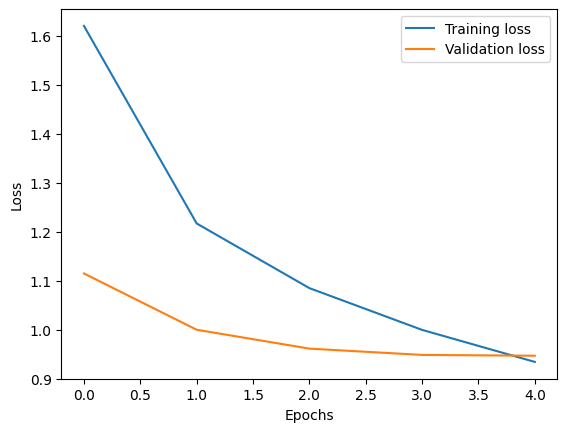

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Convert the predicted summaries to a numpy array
predicted_summaries_array = np.array(predicted_summaries)

# Save the predicted summaries to a file
np.savetxt('GRU_predicted_summaries.txt', predicted_summaries_array, fmt='%s')

## **GRU for 25% of dataset with Epoch=15**

In [ ]:
subset_train_data = train_data.sample(frac=0.25, random_state=42)
subset_test_data = test_data.sample(frac=0.25, random_state=42)

In [ ]:
from gensim.models import Word2Vec

# Determine the desired embedding dimension
embedding_dim = 100

# Concatenate the article and summary texts for building Word2Vec vocabulary
all_texts = subset_train_data['article'].tolist() + subset_test_data['summary'].tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_texts, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Get the vocabulary size and word embedding dimension
vocab_size = len(w2v_model.wv.key_to_index)
embedding_dim = w2v_model.vector_size

# Convert text sequences to numerical sequences
def text_to_sequences(texts):
    sequences = []
    for text in texts:
        sequence = []
        for word in text:
            if word in w2v_model.wv.key_to_index:
                sequence.append(w2v_model.wv.key_to_index[word])
            else:
                sequence.append(0)  # Use index 0 for out-of-vocabulary words
        sequences.append(sequence)
    return sequences

# Convert the preprocessed dataset to numerical sequences
subset_train_article_sequences = text_to_sequences(subset_train_data['article'])
subset_train_summary_sequences = text_to_sequences(subset_train_data['summary'])
subset_test_article_sequences = text_to_sequences(subset_test_data['article'])
subset_test_summary_sequences = text_to_sequences(subset_test_data['summary'])

# Pad the sequences to the same length
subset_train_article_sequences = tf.keras.preprocessing.sequence.pad_sequences(subset_train_article_sequences, padding='post')
subset_train_summary_sequences = tf.keras.preprocessing.sequence.pad_sequences(subset_train_summary_sequences, padding='post')
subset_test_article_sequences = tf.keras.preprocessing.sequence.pad_sequences(subset_test_article_sequences, padding='post')
subset_test_summary_sequences = tf.keras.preprocessing.sequence.pad_sequences(subset_test_summary_sequences, padding='post')


In [ ]:
hidden_units = 256
learning_rate = 0.001
num_epochs = 15

# Define the encoder-decoder model architecture
encoder_input = Input(shape=(None,))
encoder_embedding = Embedding(vocab_size, embedding_dim, trainable=True)(encoder_input)
encoder_output, encoder_state = GRU(units=hidden_units, return_state=True)(encoder_embedding)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(vocab_size, embedding_dim, trainable=True)(decoder_input)
decoder_gru = GRU(units=hidden_units, return_sequences=True, return_state=True)
decoder_output, _ = decoder_gru(decoder_embedding, initial_state=encoder_state)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_output = decoder_dense(decoder_output)

# Define the model
model = Model([encoder_input, decoder_input], decoder_output)

In [ ]:
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
optimizer = Adam(learning_rate)
loss = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

# Train the model
history = model.fit(
    [subset_train_article_sequences, subset_train_summary_sequences[:, :-1]],
    subset_train_summary_sequences[:, 1:],
    epochs=num_epochs,
    validation_data=(
        [subset_test_article_sequences, subset_test_summary_sequences[:, :-1]],
        subset_test_summary_sequences[:, 1:]
    )
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


641/641 [==============================] - 282s 429ms/step - loss: 2.0191 - val_loss: 2.4767
Epoch 2/15
641/641 [==============================] - 218s 339ms/step - loss: 1.5636 - val_loss: 2.3091
Epoch 3/15
641/641 [==============================] - 192s 299ms/step - loss: 1.4266 - val_loss: 2.1505
Epoch 4/15
641/641 [==============================] - 188s 293ms/step - loss: 1.3067 - val_loss: 2.0544
Epoch 5/15
641/641 [==============================] - 182s 283ms/step - loss: 1.2067 - val_loss: 1.9939
Epoch 6/15
641/641 [==============================] - 180s 280ms/step - loss: 1.1210 - val_loss: 1.9672
Epoch 7/15
641/641 [==============================] - 179s 279ms/step - loss: 1.0447 - val_loss: 1.9566
Epoch 8/15
641/641 [==============================] - 174s 272ms/step - loss: 0.9760 - val_loss: 1.9539
Epoch 9/15
641/641 [==============================] - 174s 272ms/step - loss: 0.9140 - val_loss: 1.9595
Epoch 10/15
641/641 [==============================] - 176s 275ms/step - lo

In [ ]:
# Save the model
tf.keras.models.save_model(model, 'GRU0.25_model.h5')

### **Evaluate GRU model for 25% of dataset**

In [ ]:
#Load the saved GRU model for 25% of dataset

from keras.models import load_model

!gdown --id 1QrtdO6OwsaG1AOn5D3AGD4kYENst43uS

model = load_model('GRU0.25_model.h5')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1SZnk4MWe59y2I2AQO-_QSpH1ReJDfxVA
From (redirected): https://drive.google.com/uc?id=1SZnk4MWe59y2I2AQO-_QSpH1ReJDfxVA&confirm=t&uuid=24c77ce7-f757-49f9-9af2-56cabae44cba
To: /content/GRU_model.h5
100% 984M/984M [00:22<00:00, 43.7MB/s]


In [ ]:
batch_size = 16  # Set a smaller batch size

# Convert the predicted sequences to text
def sequences_to_text(sequences):
    texts = []
    for sequence in sequences:
        text = []
        for index in sequence:
            word = w2v_model.wv.index_to_key[index]
            if word != '<PAD>':  # Exclude padding tokens
                text.append(word)
        texts.append(text)
    return texts

# Generate summaries in batches
predicted_summaries = []
num_samples = len(subset_test_article_sequences)
for i in range(0, num_samples, batch_size):
    batch_article_sequences = subset_test_article_sequences[i:i+batch_size]
    batch_summary_sequences = subset_test_summary_sequences[i:i+batch_size]
    predictions = model.predict([batch_article_sequences, batch_summary_sequences[:, :-1]])
    batch_predicted_summaries = sequences_to_text(np.argmax(predictions, axis=-1))
    predicted_summaries.extend(batch_predicted_summaries)


1/1 [==============================] - 0s 53ms/step


In [ ]:
predicted_summaries

[['فروش',
  'اطفای',
  'کیفیت',
  'شرکت',
  'نفتی',
  'پارس',
  'ماه',
  'شرکت',
  'صنعت',
  'نفت',
  'شرکت',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['کمیسیون',
  'شهرداریها',
  'محیط',
  'نفت',
  'ایران',
  'شرکت',
  'پایش',
  'کاتدیک',
  'مقابله',
  '۱۳',
  'پارس',
  'جنوبی',
  'اقدامهای',
  'آغاز',
  'n',
  'n',
  'بهرهبرداری',
  'صنعت',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['همکاری',
  'سازمان',
  'صنعت',
  'وزارت',
  'گردشگری',
  'میراث',
 

In [ ]:
# Convert the predicted and reference summaries to strings
predicted_summaries = [' '.join(summary) for summary in predicted_summaries]
reference_summaries = [' '.join(summary) for summary in subset_test_data['summary']]

In [ ]:
print("Length of predicted summaries:", len(predicted_summaries))
print("Length of reference summaries:", len(reference_summaries))

Length of predicted summaries: 1398
Length of reference summaries: 1398


In [ ]:
from rouge import Rouge

# Initialize the ROUGE scorer
rouge = Rouge()

# Calculate the ROUGE scores
scores = rouge.get_scores(predicted_summaries, reference_summaries, avg=True)

print("ROUGE scores:")
print("ROUGE-1: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-1']['p'], scores['rouge-1']['r'], scores['rouge-1']['f']
))
print("ROUGE-2: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-2']['p'], scores['rouge-2']['r'], scores['rouge-2']['f']
))
print("ROUGE-L: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-l']['p'], scores['rouge-l']['r'], scores['rouge-l']['f']
))

ROUGE scores:
ROUGE-1: Precision: 0.2553, Recall: 0.2183, F1-Score: 0.2340
ROUGE-2: Precision: 0.0619, Recall: 0.0642, F1-Score: 0.0629
ROUGE-L: Precision: 0.2355, Recall: 0.2015, F1-Score: 0.2159


In [ ]:
# Evaluate the model by loss value
loss = model.evaluate(
    [subset_test_article_sequences, subset_test_summary_sequences[:, :-1]],
    subset_test_summary_sequences[:, 1:]
)

print("Test loss:", loss)

44/44 [==============================] - 4s 93ms/step - loss: 2.0574
Test loss: 2.0573811531066895


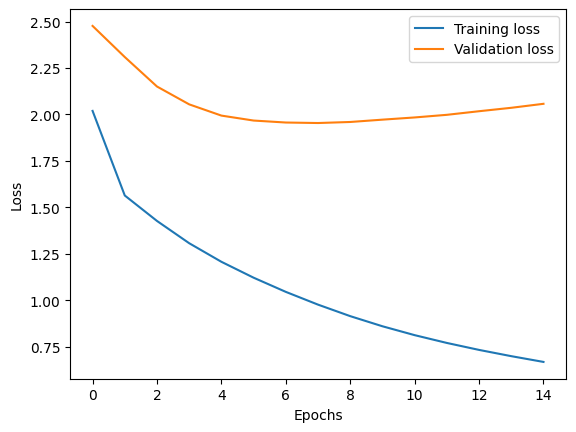

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Convert the predicted summaries to a numpy array
predicted_summaries_array = np.array(predicted_summaries)

# Save the predicted summaries to a file
np.savetxt('GRU0.25_predicted_summaries.txt', predicted_summaries_array, fmt='%s')

# **Step 3) LSTM model**

## **LSTM for the whole dataset**

Epoch 1/5
8203/8203 [==============================] - 964s 117ms/step - loss: 1.4575 - val_loss: 1.2563
Epoch 2/5
8203/8203 [==============================] - 958s 117ms/step - loss: 1.1549 - val_loss: 1.1702
Epoch 3/5
8203/8203 [==============================] - 999s 122ms/step - loss: 1.0454 - val_loss: 1.1441
Epoch 4/5
8203/8203 [==============================] - 953s 116ms/step - loss: 0.9704 - val_loss: 1.1412
Epoch 5/5
175/175 [==============================] - 37s 207ms/step - loss: 0.9599
Test loss: 0.9599261283874512


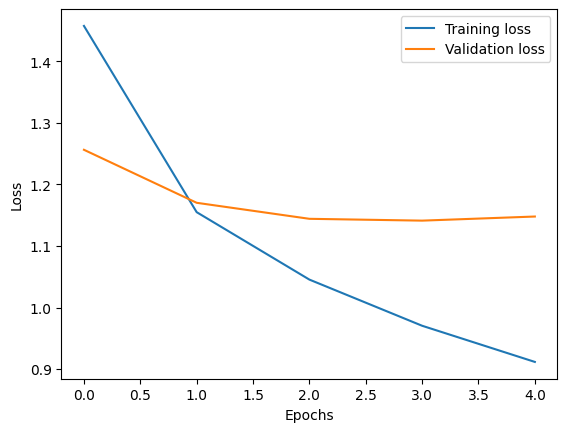

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense

# Define the model architecture
def create_model(vocab_size, embedding_dim, hidden_units):
    # Encoder
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_inputs)
    encoder_lstm = Bidirectional(LSTM(hidden_units, return_sequences=True))(encoder_embedding)

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_inputs)
    decoder_lstm = LSTM(hidden_units, return_sequences=True)(decoder_embedding)
    decoder_outputs = Dense(vocab_size, activation='softmax')(decoder_lstm)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

# Set the hyperparameters
embedding_dim = 100
hidden_units = 256

# Create the model
model = create_model(vocab_size, embedding_dim, hidden_units)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
history = model.fit(
    [train_article_sequences, train_summary_sequences[:, :-1]],
    train_summary_sequences[:, 1:],
    batch_size=8,
    epochs=5,
    validation_split=0.2
)

# Evaluate the model
loss = model.evaluate(
    [test_article_sequences, test_summary_sequences[:, :-1]],
    test_summary_sequences[:, 1:]
)

print("Test loss:", loss)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model

tf.keras.models.save_model(model, 'LSTM_model.h5')

### **Evaluate LSTM model for the whole dataset**

In [ ]:
#Load the saved LSTM model

from keras.models import load_model

!gdown --id 1xymM0yBnVS6NEv_blR_2PGzQ4nhASAw1

model = load_model('LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1xymM0yBnVS6NEv_blR_2PGzQ4nhASAw1
From (redirected): https://drive.google.com/uc?id=1xymM0yBnVS6NEv_blR_2PGzQ4nhASAw1&confirm=t&uuid=83d7e304-8ee1-41fe-9a83-ced6f9d1a76b
To: /content/LSTM_model.h5
100% 768M/768M [00:25<00:00, 30.2MB/s]


In [ ]:
batch_size = 16  # Set a smaller batch size

# Convert the predicted sequences to text
def sequences_to_text(sequences):
    texts = []
    for sequence in sequences:
        text = []
        for index in sequence:
            word = w2v_model.wv.index_to_key[index]
            if word != '<PAD>':  # Exclude padding tokens
                text.append(word)
        texts.append(text)
    return texts

# Generate summaries in batches
predicted_summaries = []
num_samples = len(test_article_sequences)
for i in range(0, num_samples, batch_size):
    batch_article_sequences = test_article_sequences[i:i+batch_size]
    batch_summary_sequences = test_summary_sequences[i:i+batch_size]
    predictions = model.predict([batch_article_sequences, batch_summary_sequences[:, :-1]])
    batch_predicted_summaries = sequences_to_text(np.argmax(predictions, axis=-1))
    predicted_summaries.extend(batch_predicted_summaries)


1/1 [==============================] - 0s 24ms/step


In [ ]:
predicted_summaries

[['فرآوردههای',
  'کوره',
  'منطقه',
  'زنجان',
  'ماه',
  'امسال',
  'مشابه',
  'پارسال',
  '۴۷',
  'درصد',
  'افزایش',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['روز',
  'تخصصی',
  'صنایع',
  'همراه',
  'ترویج',
  'بهبود',
  'بهبود',
  'درمان',
  'پژوهشی',
  'فناوری',
  'میشود',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
 

In [ ]:
2# Convert the predicted and reference summaries to strings
predicted_summaries = [' '.join(summary) for summary in predicted_summaries]
reference_summaries = [' '.join(summary) for summary in test_data['summary']]

In [ ]:
print("Length of predicted summaries:", len(predicted_summaries))
print("Length of reference summaries:", len(reference_summaries))

Length of predicted summaries: 5593
Length of reference summaries: 5593


In [ ]:
# Evaluate the model by loss value
from rouge import Rouge

# Initialize the ROUGE scorer
rouge = Rouge()

# Calculate the ROUGE scores
scores = rouge.get_scores(predicted_summaries, reference_summaries, avg=True)

print("ROUGE scores:")
print("ROUGE-1: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-1']['p'], scores['rouge-1']['r'], scores['rouge-1']['f']
))
print("ROUGE-2: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-2']['p'], scores['rouge-2']['r'], scores['rouge-2']['f']
))
print("ROUGE-L: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-l']['p'], scores['rouge-l']['r'], scores['rouge-l']['f']
))

ROUGE scores:
ROUGE-1: Precision: 0.3075, Recall: 0.2573, F1-Score: 0.2783
ROUGE-2: Precision: 0.0803, Recall: 0.0830, F1-Score: 0.0815
ROUGE-L: Precision: 0.2838, Recall: 0.2378, F1-Score: 0.2571


In [ ]:
import numpy as np

# Convert the predicted summaries to a numpy array
predicted_summaries_array = np.array(predicted_summaries)

# Save the predicted summaries to a file
np.savetxt('LSTM_predicted_summaries.txt', predicted_summaries_array, fmt='%s')

## **LSTM for 25% of dataset with Epoch=15**

Epoch 1/15
2051/2051 [==============================] - 141s 67ms/step - loss: 1.7697 - val_loss: 1.5433
Epoch 2/15
2051/2051 [==============================] - 122s 59ms/step - loss: 1.4226 - val_loss: 1.3956
Epoch 3/15
2051/2051 [==============================] - 122s 59ms/step - loss: 1.2674 - val_loss: 1.3260
Epoch 4/15
2051/2051 [==============================] - 121s 59ms/step - loss: 1.1510 - val_loss: 1.2991
Epoch 5/15
2051/2051 [==============================] - 120s 59ms/step - loss: 1.0508 - val_loss: 1.2935
Epoch 6/15
2051/2051 [==============================] - 121s 59ms/step - loss: 0.9596 - val_loss: 1.3011
Epoch 7/15
2051/2051 [==============================] - 121s 59ms/step - loss: 0.8760 - val_loss: 1.3196
Epoch 8/15
2051/2051 [==============================] - 129s 63ms/step - loss: 0.8025 - val_loss: 1.3429
Epoch 9/15
2051/2051 [==============================] - 121s 59ms/step - loss: 0.7407 - val_loss: 1.3655
Epoch 10/15
2051/2051 [==============================] 

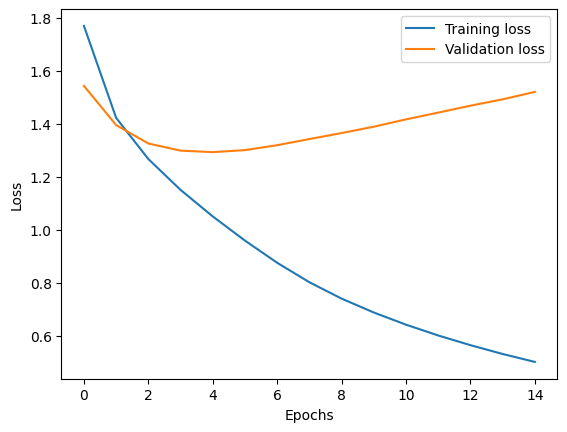

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense

# Define the model architecture
def create_model(vocab_size, embedding_dim, hidden_units):
    # Encoder
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_inputs)
    encoder_lstm = Bidirectional(LSTM(hidden_units, return_sequences=True))(encoder_embedding)

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_inputs)
    decoder_lstm = LSTM(hidden_units, return_sequences=True)(decoder_embedding)
    decoder_outputs = Dense(vocab_size, activation='softmax')(decoder_lstm)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

# Set the hyperparameters
embedding_dim = 100
hidden_units = 256

# Create the model
model = create_model(vocab_size, embedding_dim, hidden_units)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
history = model.fit(
    [subset_train_article_sequences, subset_train_summary_sequences[:, :-1]],
    subset_train_summary_sequences[:, 1:],
    batch_size=8,
    epochs=15,
    validation_split=0.2
)

# Evaluate the model
loss = model.evaluate(
    [subset_test_article_sequences, subset_test_summary_sequences[:, :-1]],
    subset_test_summary_sequences[:, 1:]
)

print("Test loss:", loss)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model

tf.keras.models.save_model(model, 'LSTM0.25_model.h5')

### **Evaluate LSTM model for 25% of dataset**

In [ ]:
#Load the saved LSTM model for 25% of daataset

from keras.models import load_model

!gdown --id 1Vom9ZXTQWzjenucePmIR8tkqylcQcqbw

model = load_model('LSTM0.25_model.h5')

In [ ]:
batch_size = 16  # Set a smaller batch size

# Convert the predicted sequences to text
def sequences_to_text(sequences):
    texts = []
    for sequence in sequences:
        text = []
        for index in sequence:
            word = w2v_model.wv.index_to_key[index]
            if word != '<PAD>':  # Exclude padding tokens
                text.append(word)
        texts.append(text)
    return texts

# Generate summaries in batches
predicted_summaries = []
num_samples = len(subset_test_article_sequences)
for i in range(0, num_samples, batch_size):
    batch_article_sequences = subset_test_article_sequences[i:i+batch_size]
    batch_summary_sequences = subset_test_summary_sequences[i:i+batch_size]
    predictions = model.predict([batch_article_sequences, batch_summary_sequences[:, :-1]])
    batch_predicted_summaries = sequences_to_text(np.argmax(predictions, axis=-1))
    predicted_summaries.extend(batch_predicted_summaries)


1/1 [==============================] - 0s 23ms/step


In [ ]:
predicted_summaries

[['توسعه',
  'تولید',
  'قیمت',
  'نفت',
  'نفتی',
  'شرکت',
  'ماه',
  'سازمان',
  'صنعت',
  'نفت',
  'شرکت',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['سازمان',
  'امداد',
  'عمومی',
  'نفت',
  'اشاره',
  'سامانه',
  'استاندارد',
  'محیط',
  'کشور',
  '۲',
  '۶',
  'جنوبی',
  'کشور',
  'شتاب',
  'بازسازی',
  'منطقه',
  'نگهداشت',
  'خبر',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['همکاری',
  'شرکت',
  'پژوهشی',
  'صنعت',
  'گردشگری',
  'حفاظت',
  'گ

In [ ]:
# Convert the predicted and reference summaries to strings
predicted_summaries = [' '.join(summary) for summary in predicted_summaries]
reference_summaries = [' '.join(summary) for summary in subset_test_data['summary']]

In [ ]:
print("Length of predicted summaries:", len(predicted_summaries))
print("Length of reference summaries:", len(reference_summaries))

Length of predicted summaries: 1398
Length of reference summaries: 1398


In [ ]:
# Evaluate the model by loss value
from rouge import Rouge

# Initialize the ROUGE scorer
rouge = Rouge()

# Calculate the ROUGE scores
scores = rouge.get_scores(predicted_summaries, reference_summaries, avg=True)

print("ROUGE scores:")
print("ROUGE-1: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-1']['p'], scores['rouge-1']['r'], scores['rouge-1']['f']
))
print("ROUGE-2: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-2']['p'], scores['rouge-2']['r'], scores['rouge-2']['f']
))
print("ROUGE-L: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-l']['p'], scores['rouge-l']['r'], scores['rouge-l']['f']
))

ROUGE scores:
ROUGE-1: Precision: 0.2331, Recall: 0.2093, F1-Score: 0.2197
ROUGE-2: Precision: 0.0612, Recall: 0.0646, F1-Score: 0.0628
ROUGE-L: Precision: 0.2171, Recall: 0.1952, F1-Score: 0.2047


In [ ]:
import numpy as np

# Convert the predicted summaries to a numpy array
predicted_summaries_array = np.array(predicted_summaries)

# Save the predicted summaries to a file
np.savetxt('LSTM0.25_predicted_summaries.txt', predicted_summaries_array, fmt='%s')

# **Step 4)**

## preprocess

In [ ]:
#run preprocess, install transformers, then run either ParsBert or mt5.

In [ ]:

def untokenize(tokens):
    """
    Untokenizes a list of tokens into a string.

    Parameters:
        tokens (list): A list of tokens representing the text.

    Returns:
        str: The untokenized text.
    """
    untokenized_text = ' '.join(tokens)
    # Add a space after punctuation marks to improve readability
    untokenized_text = untokenized_text.replace(' .', '.').replace(' ,', ',').replace(' !', '!').replace(' ?', '?')
    return untokenized_text

train_data['article'] = train_data['article'].apply(untokenize)
train_data['summary'] = train_data['summary'].apply(untokenize)
test_data['article'] = test_data['article'].apply(untokenize)
test_data['summary'] = test_data['summary'].apply(untokenize)

<ipython-input-8-d051152b9807>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['article'] = train_data['article'].apply(untokenize)
<ipython-input-8-d051152b9807>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['summary'] = train_data['summary'].apply(untokenize)
<ipython-input-8-d051152b9807>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# **ParsBERT Model**

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel

# Preprocess the data
def preprocess_data(texts):
    tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
    encoding = tokenizer.batch_encode_plus(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )
    input_ids = encoding["input_ids"].squeeze().to(device)
    attention_mask = encoding["attention_mask"].squeeze().to(device)
    return input_ids, attention_mask

train_input_ids, train_attention_mask = preprocess_data(train_data['article'])
train_labels = preprocess_data(train_data['summary'])[0]

test_input_ids, test_attention_mask = preprocess_data(test_data['article'])
test_labels = preprocess_data(test_data['summary'])[0]

# Define the model
model_name = "HooshvareLab/bert-base-parsbert-uncased"
model = AutoModel.from_pretrained(model_name).to(device)

# Get the vocabulary size
vocab_size = model.config.vocab_size


# Set the optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 5

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(
        input_ids=train_input_ids,
        attention_mask=train_attention_mask
    )
    optimizer.step()




Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


OutOfMemoryError: ignored

## fine tune mt5 on my the dataset

In [ ]:
!pip install tensorflow keras transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.9.1 requires numpy<2.0.0,>=1.24.3, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!pip install rouge

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.7 MB/s eta 0:00:00


In [ ]:
from transformers import  MT5Tokenizer

checkpoint = "google/mt5-base"
tokenizer =MT5Tokenizer.from_pretrained(checkpoint)

In [ ]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

### convert to Huggingface dataset
hg_dataset = Dataset(pa.Table.from_pandas(subset_train_data))
test=Dataset(pa.Table.from_pandas(subset_test_data))
billsum = hg_dataset.train_test_split(test_size=0.2)
test=test.train_test_split(test_size=1)

In [ ]:
tokenized_billsum = billsum.map(preprocess_function, batched=True)
tokenized_test=test.map(preprocess_function, batched=True)

Map:   0%|          | 0/6561 [00:00<?, ? examples/s]

Map:   0%|          | 0/1641 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint, return_tensors="tf")

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

In [ ]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)

In [ ]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_billsum["train"],
    shuffle=True,
    batch_size=1,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_billsum["test"],
    shuffle=False,
    batch_size=1,
    collate_fn=data_collator,
)
tf_test_set = model.prepare_tf_dataset(
    tokenized_test["test"],
    shuffle=False,
    batch_size=1,
    collate_fn=data_collator,
)


In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer)  # No loss argument!

In [ ]:
!pip install evaluate

In [ ]:
!pip install rouge_score

In [ ]:
import evaluate

rouge = evaluate.load("rouge")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer,AutoModel
checkpoint = "google/mt5-small"
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 13.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import TFAutoModelForSeq2SeqLM

model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFMT5ForConditionalGeneration.

All the layers of TFMT5ForConditionalGeneration were initialized from the model checkpoint at google/mt5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMT5ForConditionalGeneration for predictions without further training.


In [ ]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

In [ ]:
model.fit(x=tf_train_set, validation_data=tf_test_set,batch_size=17, epochs=3)

Epoch 1/3
6561/6561 [==============================] - 1615s 239ms/step - loss: 6.0554 - val_loss: 2.4815
Epoch 2/3
6561/6561 [==============================] - 1558s 238ms/step - loss: 3.2441 - val_loss: 2.5663
Epoch 3/3
6561/6561 [==============================] - 1553s 237ms/step - loss: 2.7054 - val_loss: 2.5995


In [ ]:

subset_test_data = test_data.sample(frac=0.01, random_state=42)

In [ ]:
reference_summaries = [' '.join(summary) for summary in subset_test_data['summary']]

In [ ]:
from rouge import Rouge

# Initialize the ROUGE scorer
rouge = Rouge()

# Calculate the ROUGE scores
scores = rouge.get_scores(predicted_summaries, reference_summaries[0:len(predicted_summaries)], avg=True)

print("ROUGE scores:")
print("ROUGE-1: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-1']['p'], scores['rouge-1']['r'], scores['rouge-1']['f']
))
print("ROUGE-2: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-2']['p'], scores['rouge-2']['r'], scores['rouge-2']['f']
))
print("ROUGE-L: Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(
    scores['rouge-l']['p'], scores['rouge-l']['r'], scores['rouge-l']['f']
))

ROUGE scores:
ROUGE-1: Precision: 0.0098, Recall: 0.0007, F1-Score: 0.0013
ROUGE-2: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
ROUGE-L: Precision: 0.0098, Recall: 0.0007, F1-Score: 0.0013


In [ ]:
print(predicted_summaries)

[' حفاظت الکترونیک', ' نداشت ', ' نرخ واردات', ' ثبت نام ', ' گزارش خبرنگار شانا', ' اصفهان اصفهان اصفهان اصفهان', ' موادمخدر کشف', ' شرکتهای دفاعی', ' اینترنتی اینترنتی', ' نکنند ', ' نبود  ادامه', ' نبود ', ' عدالت ', ' تیم فصل گذشته', ' نرخ باران باران', ' امروز نقاط کشور جوی آرام', ' آذربایجان غربی', ' صهیونیستها', ' ن  ادامه', ' نگاهی زندگی ', ' نرخ نرخ نرخ', ' نبود طرحهای', ' نبرد نبرد', ' نبود ', ' نبود همهگیری', ' گروه سالم ', ' گروهها دوره دوره', ' مواد مخدر نبود', ' توسط ترامپ انتخابات', ' نبود نبود', ' نبود ', ' نفت خام خام', ' کارشناسی ارشد علوم', ' شرکت نفتکش ایران', ' نبود نبود', ' نرخ سود سیاستی  نرخ سود سیاستی نرخ سود بازار بانکی نرخ سود سیاستی نرخ سود بازار بانکی نرخ سود سیاستی نرخ سود بازار بانکی نرخ سود سیاستی بانکها نرخ کف نرخ کف بانکها بانکها بانکها بانکها', ' نبود واکنش مناسب', ' نرخ نفت خام', ' شرکت هندوستان پترولیوم', ' معدن معدن معدن', ' منطقه سیستان منطقه', ' انتقال آب دریای مازندران', ' نفت ', ' وزیر نفت وزیر نفت', ' هزار ۹۷۲ واحد ', ' ظریف نگاهی', ' دولت نبو

# **Step 5) Comparing Models & Displaying some summaries made by the best model**

In [ ]:
#Uploading saved predicted summaries by models

#GRU_predicted_summaries.txt
!gdown --id 1nK9QnsBbEw1PjEtLmnJln4ds359POO4q

#GRU0.25_predicted_summaries.txt
!gdown --id 1AoWirgXKud5CR3ZWtRVXESPSsBcSLoQt

#LSTM_predicted_summaries.txt
!gdown --id 1t3CpJzJtgndx80c7HD09Z7sR_yOfxT-Q

#LSTM0.25_predicted_summaries.txt
!gdown --id 1XoiElY7ez4y-iehxfcgfDmnkwK6nPe50

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nK9QnsBbEw1PjEtLmnJln4ds359POO4q
To: /content/GRU_predicted_summaries.txt
100% 1.97M/1.97M [00:00<00:00, 217MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AoWirgXKud5CR3ZWtRVXESPSsBcSLoQt
To: /content/GRU0.25_predicted_summaries.txt
100% 363k/363k [00:00<00:00, 151MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
F

In [ ]:
import numpy as np

# Load the predicted summaries from the files & Convert the numpy array back to a list
GRU_predicted_summaries_array = np.loadtxt('GRU_predicted_summaries.txt', dtype=str)
GRU_predicted_summaries = GRU_predicted_summaries_array.tolist()

GRU25_predicted_summaries_array = np.loadtxt('GRU0.25_predicted_summaries.txt', dtype=str)
GRU25_predicted_summaries = GRU25_predicted_summaries_array.tolist()

LSTM_predicted_summaries_array = np.loadtxt('LSTM_predicted_summaries.txt', dtype=str)
LSTM_predicted_summaries = LSTM_predicted_summaries_array.tolist()

LSTM25_predicted_summaries_array = np.loadtxt('LSTM0.25_predicted_summaries.txt', dtype=str)
LSTM25_predicted_summaries = LSTM25_predicted_summaries_array.tolist()

In [ ]:
# Convert the predicted and reference summaries & articles to strings

reference_articles = [' '.join(article) for article in test_data['article']]
reference_summaries = [' '.join(summary) for summary in test_data['summary']]
GRU_predicted_summaries = [' '.join(summary) for summary in GRU_predicted_summaries]
GRU25_predicted_summaries = [' '.join(summary) for summary in GRU25_predicted_summaries]
LSTM_predicted_summaries = [' '.join(summary) for summary in LSTM_predicted_summaries]
LSTM25_predicted_summaries = [' '.join(summary) for summary in LSTM25_predicted_summaries]

In [ ]:
# Display some summaries made by created models

num_summaries = 10  # Number of summaries to display

for i in range(num_summaries):
    print("Original Article:")
    print(reference_articles[i])
    print("\nOriginal Summary:")
    print(reference_summaries[i])
    print("\nGenerated Summary with GRU model on the whole dataset:")
    print(GRU_predicted_summaries[i])
    print("\nGenerated Summary with GRU model on the 25% of dataset:")
    print(GRU25_predicted_summaries[i])
    print("\nGenerated Summary with LSTM model on the whole dataset:")
    print(LSTM_predicted_summaries[i])
    print("\nGenerated Summary with LSTM model on 25% of whole dataset:")
    print(LSTM25_predicted_summaries[i])
    print("----------------------------------------------------------------------")

Original Article:
مدیر شرکت ملی فرآوردههای نفتی منطقه سبزوار خبرنگار شانا مصرف نفت کوره منطقه دلیل توسعه شبکه گاز طبیعی ماه امسال ۵۸ درصد کاهش مشابه سال ۳۷۰ هزار لیتر رسیده_است n عیسی افتخاری بنزین مصرفی منطقه بازه زمانی یاد ۳۸ میلیون ۹۷۵ هزار لیتر اعلام اظهار مقدار افزایش درصدی مصرف سوخت قیاس بهار پارسال حکایت n ۹۳ روز امسال ۴۶ میلیون ۲۳۶ هزار لیتر نفت گاز منطقه سبزوار مصرف مشابه سال افزایش نیم درصدی همراه n مدیر شرکت ملی فرآوردههای نفتی منطقه سبزوار مصرف میلیون ۹۵۹ هزار لیتر نفت سفید منطقه خبر مصرف سوخت قیاس ماه پارسال ۲۶ درصد کاهش n افتخاری تصریح مجموع مصرف انواع فرآورده نفتی منطقه سبزوار فصل امسال درصد کاهش مشابه پارسال ۸۹ میلیون ۵۴۱ هزار لیتر رسیده_است n یادآور ۹۳ روز امسال مصرف گاز طبیعی فشرده ان جی منطقه سبزوار ۳۵ درصد افزایش زمان یاد سال ۱۰ میلیون ۶۰۰ هزار مترمکعب رسیده_است

Original Summary:
مصرف نفت کوره منطقه سبزوار بهار امسال مشابه پارسال ۵۸ درصد کاهش

Generated Summary with GRU model on the whole dataset:
فرآوردههای گاز منطقه زنجان ماه امسال مشابه پارسال افزایش درصد کاهش n